#Inits

In [10]:
# Deep Learning Test
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoidDeriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def cost(x,Y):
    return 1/n*np.sum(np.square(Y-x))

def costDeriv(x):
    return x-Y

def forwardProp(X,weights,biases):
    zs = []
    a = [X]
    
    for b,w in zip(biases[0:-1], weights[0:-1]):
        z = np.dot(w,a[-1])+b
        zs.append(z)
        a.append(sigmoid(z))
        
    z = np.dot(weights[-1],a[-1])+biases[-1]
    zs.append(z)
    a.append(z)
    
    return zs, a

def backProp(zs, a, weights, biases):
    
    alpha = .01
    deltas = [0 for b in biases]
    
    #output error
    deltas[-1] = costDeriv(a[-1])*a[-1]
    
    #hidden layer back prop
    for l in range(2, hlayers+2):
        deltas[-l] = np.dot(weights[-l+1].T,deltas[-l+1])*sigmoidDeriv(zs[-l])
    
    #grad descent
    for i in range(len(weights)):
        weights[i] = weights[i] - alpha/n * np.dot(deltas[i],a[i].T)
    for i in range(len(biases)):
        biases[i] = biases[i] - alpha/n * np.sum(deltas[i], axis=1, keepdims=True)
    
    
    return weights, biases

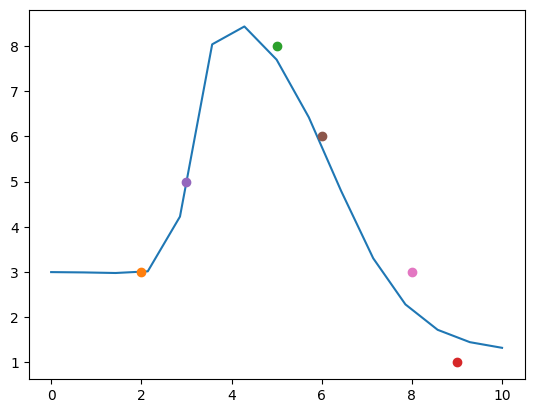

1000000


In [16]:
inputs = 1  #number of input nodes
hlayers = 1 #number of hidden layers
nodes = 2   #number of nodes per hidden layer
outputs = 1 #number of output nodes

X = np.array([[2],[5],[9],[3],[6],[8]]).T
Y = np.array([[3],[8],[1],[5],[6],[3]]).T
n = X.size

# initialize weights and biases
weights = []
weights.append(np.random.randn(nodes,inputs))
for i in range(1,hlayers):
    weights.append(np.random.randn(nodes,nodes))
weights.append(np.random.randn(outputs,nodes))

biases = []
biases.append(np.random.randn(nodes,1))
for i in range(1,hlayers):
    biases.append(np.random.randn(nodes,1))
biases.append(np.random.randn(outputs,1))


iters = 1000000
J = 2
newJ = 1
Js = []
counter = 0

x = np.array([np.linspace(0,10,15)])
y, superduberthrowawaythisvariable = forwardProp(x, weights, biases)

#plt.plot(x.T,y[-1].T)
#plt.plot(X,Y, 'o')
#plt.show()

while((newJ-J)/J < 100 and counter < iters and abs((newJ-J)/J) > 1e-7):
    counter+=1
    J = newJ
    zs, a = forwardProp(X, weights, biases)
    weights, biases = backProp(zs, a,weights, biases)
    newJ = cost(zs[-1],Y)

x = np.array([np.linspace(0,10,15)])
y, superduberthrowawaythisvariable = forwardProp(x, weights, biases)

iterations = np.array([np.linspace(1,counter,len(Js))])

#plot
plt.plot(x.T,y[-1].T)
plt.plot(X,Y, 'o')
plt.show()

print(counter)

In [8]:
print(zs)

[array([[ 25.42792518,  57.74497695, 100.83437931,  36.20027577,
         68.51732754,  90.06202872],
       [ 41.25600776,  98.02598761, 173.71929409,  60.17933438,
        116.94931423, 154.79596747]]), array([[-215749.34507072, -215749.34507137, -215749.34507137,
        -215749.34507137, -215749.34507137, -215749.34507137]])]


In [ ]:
print(a)